# Biodiversity in National Parks

*This project was completed as a part of the Data Science Foundations II section of the Data Scientist: Machine Learning Specialist career path curriculum.*

## Introduction

National parks operate on the general principle of wildlife conservation. Thus, monitoring and analysing the biodiversity is an essential task in order to assess whether species of both flora and fauna are surviving. Two datasets have been provided with the project. One contains information about each species of fauna and flora (taxonomy, scientific name, common name, conservation status) and the other contains frequency data of observations of each species, grouped by national park.

## Scope

The section covered exploratory data analysis, statistics fundamentals, data visualisation and data wrangling, tidying, cleaning. Thus the scope of this simple project is to summarise and visualise the data set of fauna and flora biodiversity in national parks with the intention of understanding the distributions of and relationships between species in national parks.

## Objectives

1. Merge and tidy datasets

2. Obtain observations, count and conservation status for each species 

2. Species distributions

3. Relationships between species

## Inspection

*import modules*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Species Information

Data contained within the `species_info.csv` file.

Columns:

- **category** (taxonomy)
- **scientific_name** 
- **common_names** 
- **conservation_status** 


In [3]:
species = pd.read_csv('data/species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
print("Species dataframe shape:")
print(species.shape)
print("\n")
print("Species dataframe, number of null values in each column:")
print(species.isnull().sum())
print("\n")
print("Unique values in each column:")
print("Category:")
print(species['category'].nunique())
print("Scientific name:")
print(species['scientific_name'].nunique())
print("Common Names:")
print(species['common_names'].nunique())
print("Conservation Status:")
print(species['conservation_status'].nunique())

Species dataframe shape:
(5824, 4)


Species dataframe, number of null values in each column:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Unique values in each column:
Category:
7
Scientific name:
5541
Common Names:
5504
Conservation Status:
4


In [5]:
# fill nan values in conservation_status column with 'No Intervention'
species.fillna('No Intervention', inplace=True)
print("Counts of each conservation status:")
print(species['conservation_status'].value_counts())
print("\n")
print("Counts of each category:")
print(species['category'].value_counts())

Counts of each conservation status:
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Counts of each category:
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


### Observations

Data contained within the `species_info.csv` file.

Columns:

- **scientific_name**
- **park_name** 
- **observations** 


In [6]:
observations = pd.read_csv('data/observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [7]:
print("Observations dataframe shape:")
print(observations.shape)
print("\n")
print("Observations columns data types:")
print(species.dtypes)
print("\n")
print("Observations dataframe, number of null values in each column:")
print(observations.isnull().sum())
print("\n")
print("Unique values in each column:")
print("Observations:")
print(observations['observations'].nunique())
print("Scientific name:")
print(observations['scientific_name'].nunique())
print("Park Name:")
print(observations['park_name'].nunique())


Observations dataframe shape:
(23296, 3)


Observations columns data types:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


Observations dataframe, number of null values in each column:
scientific_name    0
park_name          0
observations       0
dtype: int64


Unique values in each column:
Observations:
304
Scientific name:
5541
Park Name:
4


In [8]:
# merge species and observations dataframes
merged = pd.merge(left=observations, right=species, how='left', on=['scientific_name'])
merged


,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention
...,...,...,...,...,...,...
25627,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,No Intervention
25628,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,No Intervention
25629,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,No Intervention
25630,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,No Intervention


## Analysis

Analysis objectives:

1. Find the proportions of each species category that have protected conservation status.

2. Obtain the breakdown of each of conservation status by species type.

3. Use chi-square testing to observe any species types that had statistically difference proportions of protected species.

4. Obtain a list of the most prevalent species subtypes (such as types of mammal).


In [9]:
species['is_protected'] = species.conservation_status != 'No Intervention'
protected_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
protected_counts.columns = ['category', 'not_protected', 'protected']
protected_counts['percent_protected'] = 100* protected_counts.protected / (protected_counts.protected + protected_counts.not_protected)
protected_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [10]:
breakdown = species.groupby(['category','conservation_status']).scientific_name.nunique().reset_index().pivot(columns='conservation_status', values='scientific_name', index='category').reset_index(drop=False).fillna(0)
breakdown[['Endangered', 'In Recovery', 'No Intervention', 'Species of Concern', 'Threatened']] = breakdown[['Endangered', 'In Recovery', 'No Intervention', 'Species of Concern', 'Threatened']].astype(int)
breakdown.set_index('category', inplace=True)
breakdown

conservation_status,Endangered,In Recovery,No Intervention,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,72,4,2
Bird,4,3,413,68,0
Fish,3,0,115,4,4
Mammal,6,1,146,22,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,73,5,0
Vascular Plant,1,0,4216,43,2


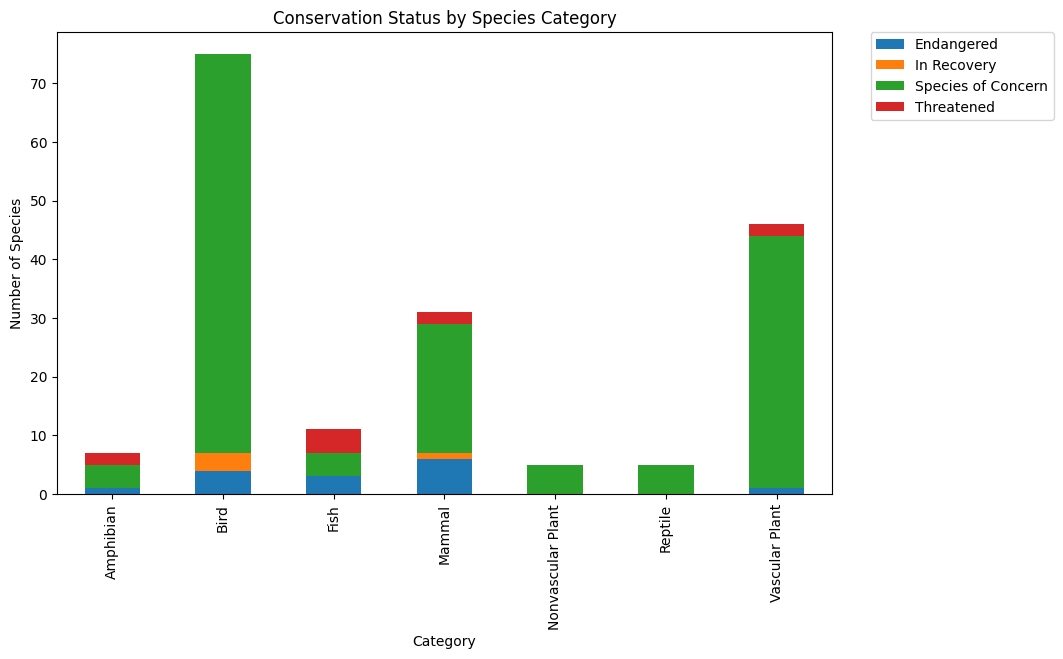

In [11]:

breakdown[['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species Category')
plt.show()



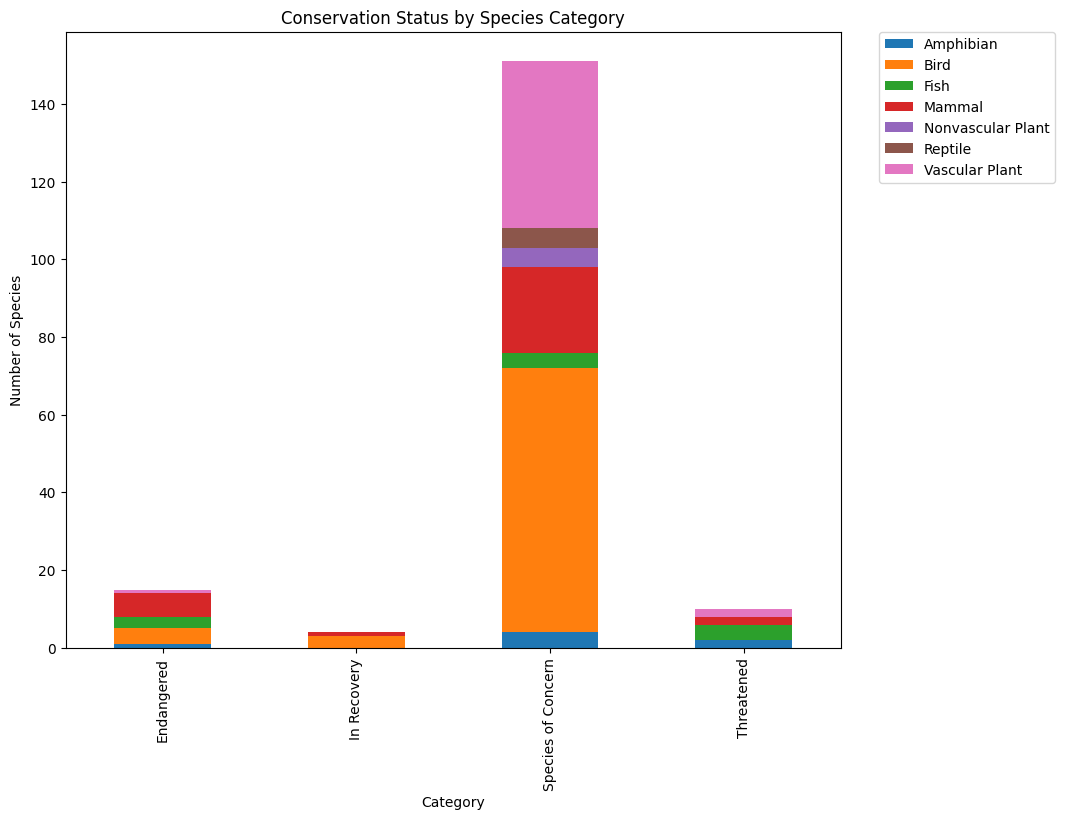

In [12]:
breakdown[['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']].T.plot(kind='bar', stacked=True, figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species Category')
plt.show()


In [13]:
# for protected_counts df, for each combination of two types of 'category', conduct a chi2 test to see if they are independent and output to a dataframe
from scipy.stats import chi2_contingency

df = pd.DataFrame([])

for cat in protected_counts.category.unique():
    df2 = {}
    df2['category'] = cat
    for cat2 in protected_counts.category.unique():
        conting = protected_counts[protected_counts.category.isin([cat, cat2])][['not_protected', 'protected']].values
        chi2, pval, dof, expected = chi2_contingency(conting)
        df2[cat2] = (round(pval, 4))
    df2 = pd.DataFrame(df2, index=[0])
    df2.set_index('category', inplace=True)

    df = pd.concat([df, df2], axis=0)
df = df.reindex(sorted(df.columns), axis=1)
df = df.sort_index()
df

,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
category,,,,,,,
Amphibian,1.0000,0.1759,1.0000,0.1276,0.0018,0.7815,0.0000
Bird,0.1759,1.0000,0.0767,0.6876,0.0000,0.0531,0.0000
Fish,1.0000,0.0767,1.0000,0.0561,0.0005,0.7407,0.0000
Mammal,0.1276,0.6876,0.0561,1.0000,0.0000,0.0384,0.0000
Nonvascular Plant,0.0018,0.0000,0.0005,0.0000,1.0000,0.0336,0.6623
Reptile,0.7815,0.0531,0.7407,0.0384,0.0336,1.0000,0.0001
Vascular Plant,0.0000,0.0000,0.0000,0.0000,0.6623,0.0001,1.0000


In [14]:
# for all values in the df, replace values less than 0.05 with 1 and values greater than 0.05 with 0#
association = df.applymap(lambda x: np.nan if x == 1 else 'Stat. Diff.' if x < 0.05 else 'Assoc.')
association

,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
category,,,,,,,
Amphibian,NaN,Assoc.,NaN,Assoc.,Stat. Diff.,Assoc.,Stat. Diff.
Bird,Assoc.,NaN,Assoc.,Assoc.,Stat. Diff.,Assoc.,Stat. Diff.
Fish,NaN,Assoc.,NaN,Assoc.,Stat. Diff.,Assoc.,Stat. Diff.
Mammal,Assoc.,Assoc.,Assoc.,NaN,Stat. Diff.,Stat. Diff.,Stat. Diff.
Nonvascular Plant,Stat. Diff.,Stat. Diff.,Stat. Diff.,Stat. Diff.,NaN,Stat. Diff.,Assoc.
Reptile,Assoc.,Assoc.,Assoc.,Stat. Diff.,Stat. Diff.,NaN,Stat. Diff.
Vascular Plant,Stat. Diff.,Stat. Diff.,Stat. Diff.,Stat. Diff.,Assoc.,Stat. Diff.,NaN


Therefore we can determine which species categories had statistically significant differences in conservation percentage and which categories were associated.

Statistically different:

- **Amphibian:** Fish, Nonvascular, Vascular Plant

- **Bird:**  Nonvascular Plant, Vascular Plant

- **Fish:**  Nonvascular Plant, Vascular Plant

- **Mammal:** Nonvascular Plant, Reptile, Vascular Plant

- **Nonvascular Plant:** Amphibian,	Bird, Fish, Mammal, Reptile

- **Reptile:** Mammal, Nonvascular Plant, Vascular Plant

- **Vascular Plant:**  Amphibian, Bird, Fish, Mammal, Nonvascular Plant, Reptile

As it may be expected, the conservation status for each plant exhibit a statistically significant different conservation percentage from each of the animal species. Hence, it may be more useful to focus on differences between animal species only. For this, the only categories that exhibited a statistical significance were Mammals and Reptiles.

In [15]:
species

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False
...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False


In [16]:
# add a new column to species with the common name split into a list of words (remove commas, spaces and anything in parentheses)
species['common_names_split'] = species.common_names.str.replace(',','').str.split()
# remove duplicate words from the list
species['common_names_split'] = species.common_names_split.apply(lambda x: list(set(x)))
species

,category,scientific_name,common_names,conservation_status,is_protected,common_names_split
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,"[Vole, Red-Backed, Gapper's]"
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,"[American, Bison]"
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,"[Aurochs, Cattle, Domesticated, (Feral), Domes..."
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,"[Mouflon, Sheep, (Feral), Domestic, Red]"
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,"[Elk, Or, Wapiti]"
...,...,...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,No Intervention,False,"[Parish's, Nightshade]"
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",No Intervention,False,"[Purple, Chaparral, Nightshade]"
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",No Intervention,False,"[Thicket, Creeper, Woodbine, Virginia]"
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",No Intervention,False,"[Wild, California, Grape]"


## Most Common Species Subcategories

In [17]:
categories = {}
for val in species['category'].unique():
    words = []
    cat = species[species['category'] == val]

    for i in range(len(cat)):
        words = words + cat.common_names_split.iloc[i]
    df = pd.DataFrame(words)
    categories[val] = df.value_counts()

### Mammals

In [18]:
categories['Mammal'].head(10)

Bat         23
Shrew       18
Myotis      17
Mouse       16
Chipmunk    13
American    12
Squirrel    12
Eastern     11
Vole        11
Western     10
dtype: int64

### Birds

In [19]:
categories['Bird'].head(10)

Warbler       59
Sparrow       29
American      21
Northern      20
Flycatcher    18
Common        18
Owl           18
Western       12
Woodpecker    12
Sandpiper     11
dtype: int64

### Reptiles

In [20]:
categories['Reptile'].head(10)

Snake         27
Northern      14
Turtle        11
Eastern       11
Lizard         9
Skink          7
Kingsnake      6
Garter         5
California     4
Racer          4
dtype: int64

### Fish

In [21]:
categories['Fish'].head(10)

Shiner      20
Darter      19
Trout       11
Dace         7
Sucker       7
Chub         7
Bass         5
Sunfish      5
Mountain     5
Brook        5
dtype: int64

### Amphibians

In [22]:
categories['Amphibian']

Salamander     41
Frog           14
Northern        8
Eastern         7
Toad            7
               ..
Plains          1
Cricket         1
Red-Legged      1
Red-Spotted     1
&Amp;           1
Length: 95, dtype: int64

Regarding the most prevalent subcategories within each category, the analysis revealed the following:

- **Mammals**: The most common subcategories within the mammal category included bats, shrews, Myotis (a genus of bats), mice, and chipmunks.

- **Birds**: The prevalent subcategories within the bird category were warblers, sparrows, American (indicating various American bird species), northern (indicating species found in the northern regions), and flycatchers.

- **Reptiles**: The most notable subcategories within the reptile category were snakes, northern reptile species, turtles, Eastern reptile species, and lizards.

- **Fish**: Within the fish category, the prevalent subcategories included shiners, darters, trout, dace, and suckers.

- **Amphibians**: Salamanders emerged as the most common subcategory within the amphibian group, followed by frogs, northern amphibian species, Eastern amphibian species, and toads.

## Conclusion

This project focused on exploring and analyzing the biodiversity in national parks, with a particular emphasis on species of flora and fauna. The datasets provided information about each species, including taxonomy, scientific name, common name, and conservation status, as well as frequency data of species observations grouped by national park.

The analysis began with merging and tidying the datasets to create a comprehensive view of the species' characteristics and conservation status. It was found that the majority of species fell into the category of vascular plants, while mammals had the highest conservation status count.

The project also investigated the most prevalent species subcategories within each category, such as the most common mammals, birds, reptiles, fish, and amphibians. Understanding the prevalence of certain subcategories and their relationships with conservation can guide wildlife management efforts in national parks. By focusing on the conservation of key subcategories, such as bats, warblers, salamanders, and snakes, conservation strategies can be tailored to protect and preserve these species and their respective habitats.

Further analysis examined the relationships between species categories and their conservation status. Chi-square tests were conducted to determine if the conservation status was independent of the species category. The results indicated that all species of fauna were statistically different to all species of flora, as might be expected. The key result of interest from the chi-square testing was that mammals and reptiles were the only species whose conservation status were not associated. In light of this observation, further investigation into these species may yield crucial information as to why mammals have the highest conservation status count since the fact that reptile species are thriving whilst mammals are struggling may have a common root cause.

Overall, this project shed light on the biodiversity present in national parks and highlighted the importance of monitoring and protecting various species. Understanding the distribution, relationships, and conservation status of species is crucial for effective wildlife conservation efforts in these natural habitats.